<a href="https://colab.research.google.com/github/MARIBELCT2015/Data_Musical_Pieces_Spotify/blob/main/M4_Actividad_fin_de_m%C3%B3dulo_maribel_cifuentes_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Fin de módulo 4
**Maribel Cifuentes Torres**</br>
**Universidad de los Andes | Educación Continua**</br>
**Programa Analítica Agencia Atenea**</br>
*12 de septiembre de 2023*


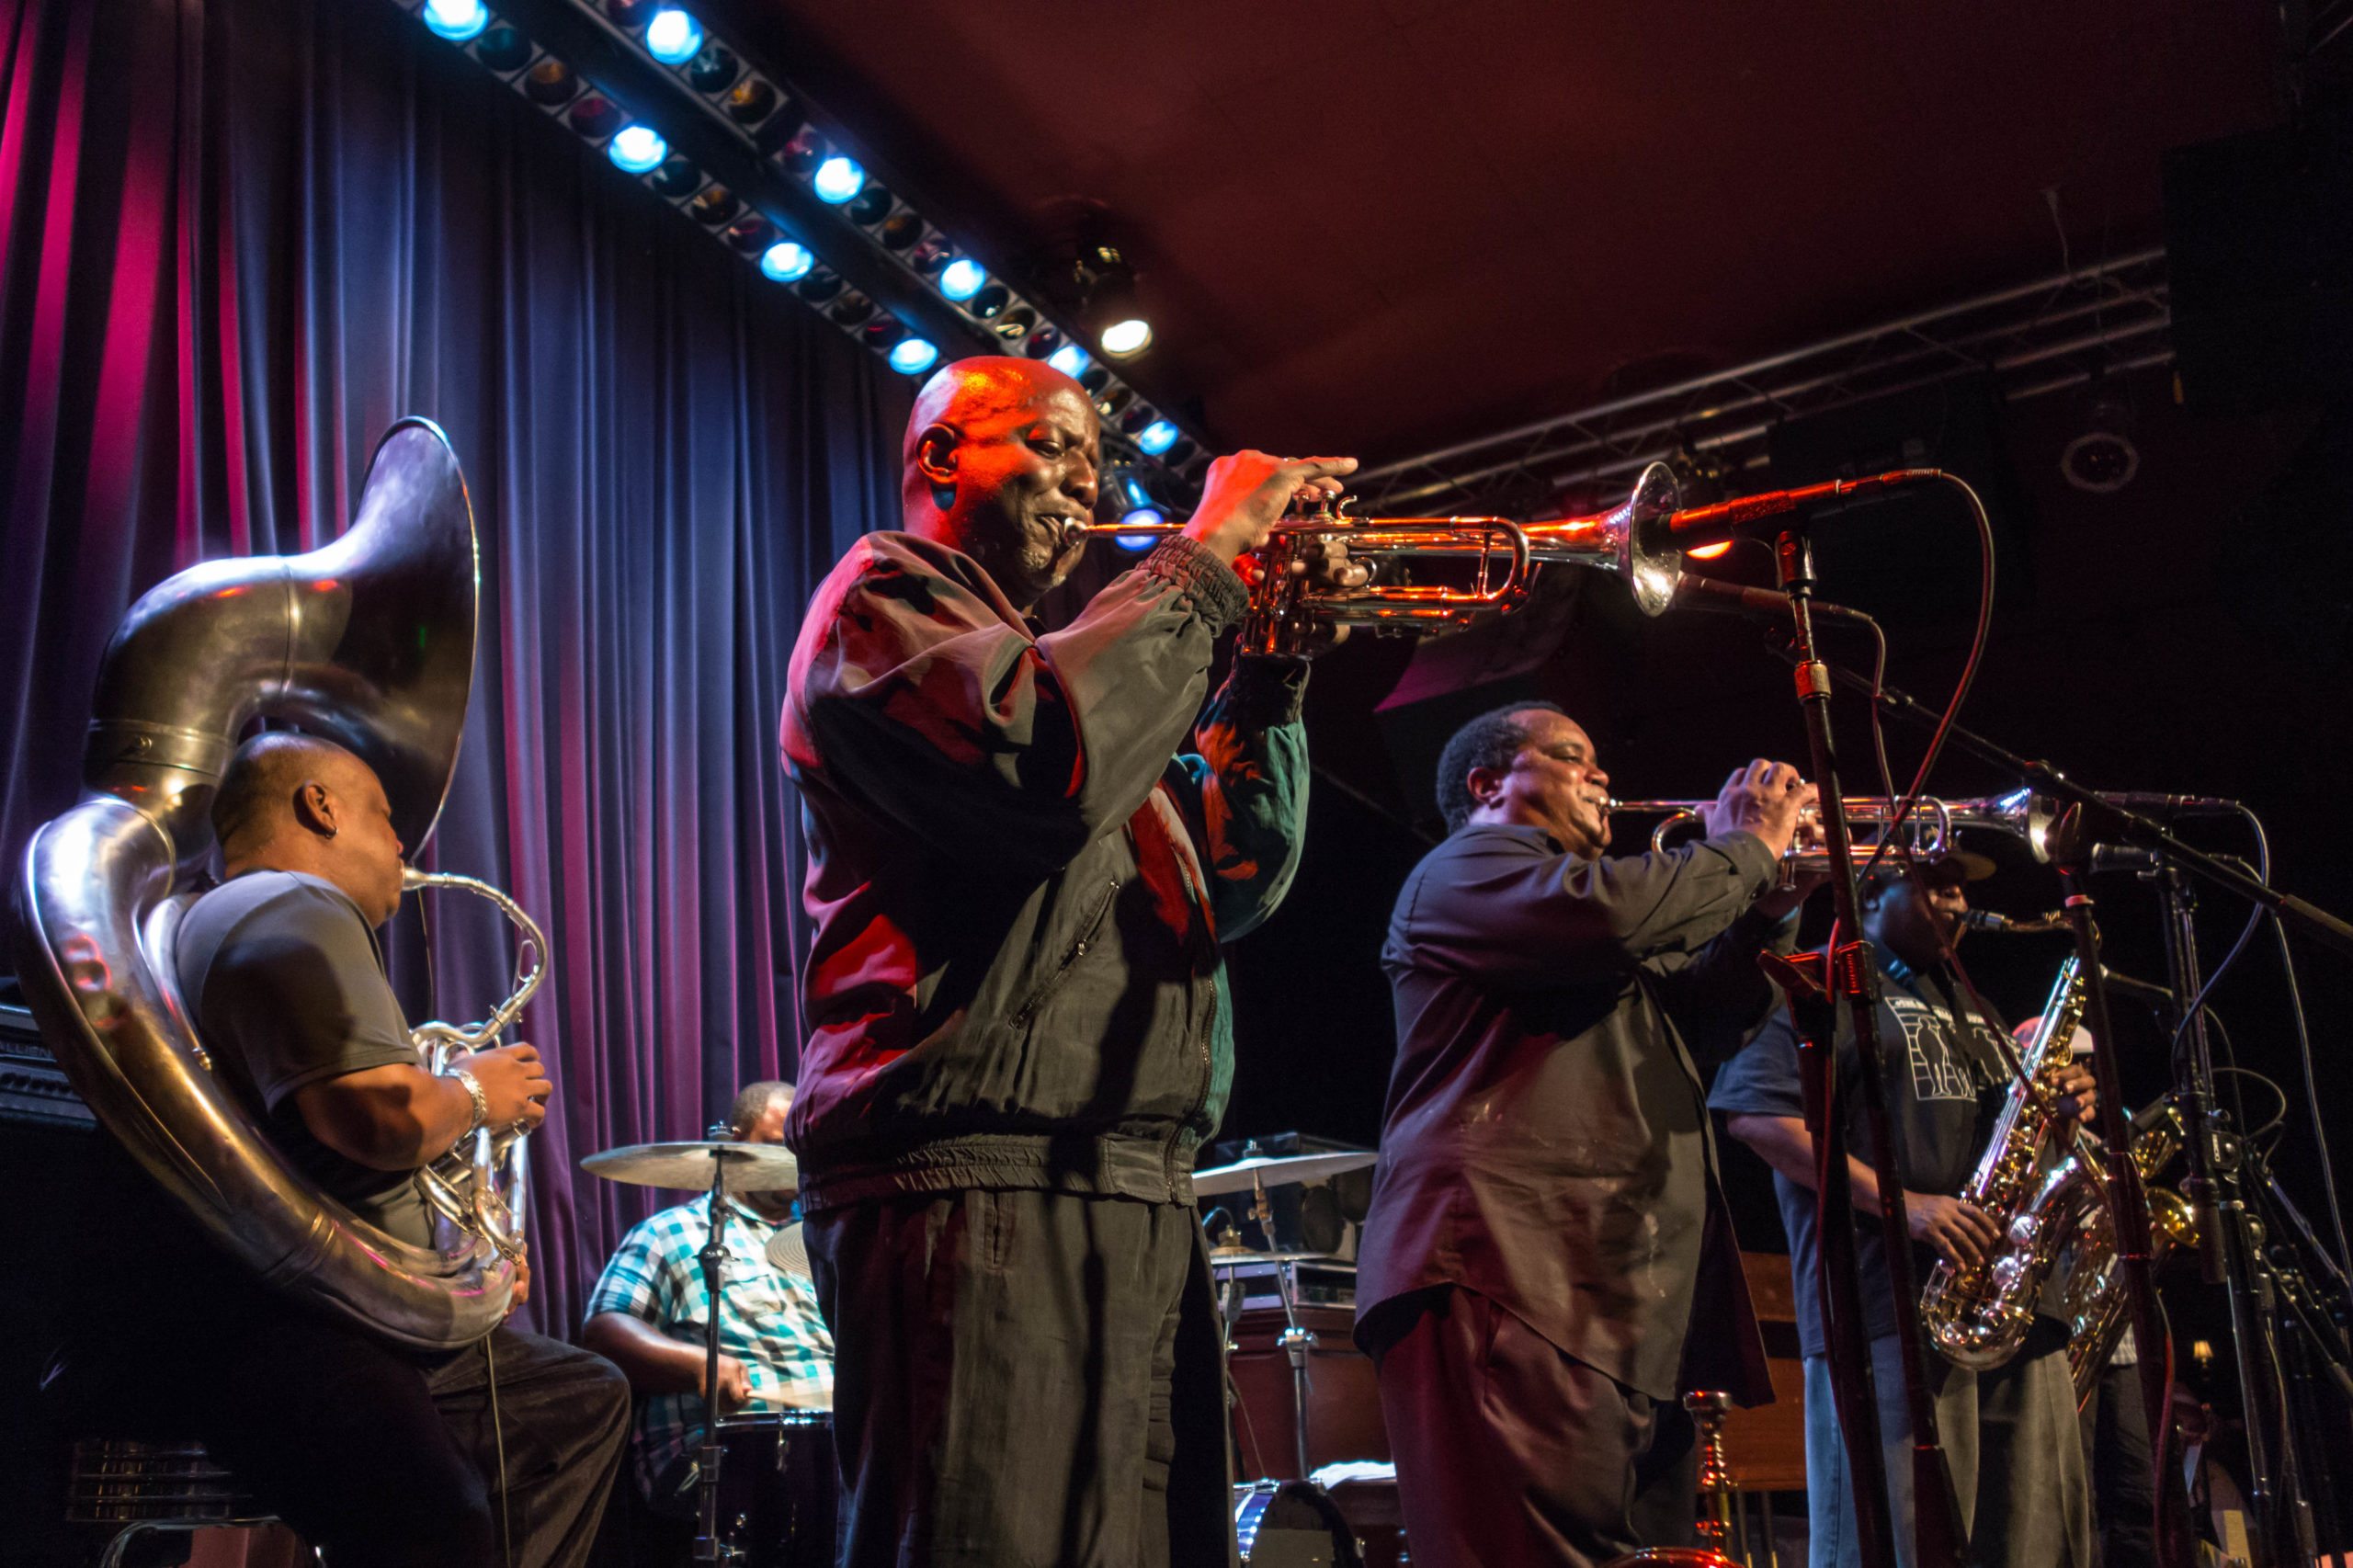

Para esta ocasión usted ha sido encargado/a con la elaboración de un modelo de clasificación que tome información de las piezas musicales y prediga en qué rango de reproducciones (streams) se ubicará esta en la plataforma Spotify.

La [base de datos](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) es la enlazada aquí. Cuenta con información formal y de percepción de más de 900 piezas musicales.

Ejecute a continuación las celdas de descripción de la base de datos, y entrene un modelo de clasificación pasando por todas las etapas de desarrollo indicadas.

## Exploración

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
datos = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

In [ ]:
#Tipos de objetos y datos nulos
datos

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
!pip install summarytools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8572 sha256=2944a710cd76f59ed2890376afa616071eb7a8d5c006d5d47dcd8cb7fe9c6d8b
  Stored in directory: /root/.cache/pip/wheels/d5/8a/5d/008e2127a7f9dd64d066f16e5ea268fa52823dc929c982d6f1
Successfully built summarytools


In [ ]:
from summarytools import dfSummary

In [ ]:
dfSummary(datos)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,track_name[object],1. Daylight2. About Damn Time3. SNAP4. Take My Breath5. Let It Snow! Let It Snow! Let 6. Miss You7. Numb8. Die For You9. SPIT IN MY FACE!10. Flowers11. other,2 (0.2%)2 (0.2%)2 (0.2%)2 (0.2%)2 (0.2%)2 (0.2%)2 (0.2%)2 (0.2%)2 (0.2%)2 (0.2%)933 (97.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
2,artist(s)_name[object],1. Taylor Swift2. The Weeknd3. Bad Bunny4. SZA5. Harry Styles6. Kendrick Lamar7. Morgan Wallen8. Ed Sheeran9. BTS10. Feid11. other,34 (3.6%)22 (2.3%)19 (2.0%)19 (2.0%)17 (1.8%)12 (1.3%)11 (1.2%)9 (0.9%)8 (0.8%)8 (0.8%)794 (83.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEPUlEQVR4nO3dQU4bWQBF0W/LosOkLMuSl5EFeBFZbBbhBbAPhKhBTGdCDwJRIMyauo7IOTPwgJJyVcal/8jq8fFxQGF96Qvg7yE2MmIjIzYyYiMjNjJiIyM2MmIjsxpjXI8xrt547fvj4+M5vh4+sM1+v/8yTdPu9QvzPN+tVquvguO9bKZp2h2Px/N2u314/ub9/f2n0+m0u729vRpjiI13sRljjO12+3A4HL69eu36AtfDB+YDAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdmM8eP82q/ffP01vIfNPM93p9NpN16dX5vn+W6M8f0yl8VHZINAZuVPZlF5687mjsYifltXWVWxlBfrKqsqlvTWusqqikV4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmxeDF0IUl/TZ4MXRhKY6FkzF4IfP6zuauxmJeDF6MXVjS+nnwcjwez0/RvTVYhv/t5+Dl6WtjFxbjoS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZN/+HF1jCr4MXYxcW5Vg4GYMXMj4gkPE2Ssa6iox1FRnrKjI+IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGsXAy1lVk3NnIGLyQMXghY/BCxkNdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDgWTsbghcyvdzZ3NRb1c/Bi7MLS1tM07T5//jyMXVjaeowxrq+v/730hfDxeahLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxk1mOMcT6f/7n0hfDxred5vru5ubGsYnE2CGSsq8i4s5GxriJjXUXGuoqMh7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELmec723BXY2mb/X7/ZYwxjF1Y2nqapp2xCwXP2ciIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyGyehi5jGLuwMMfCyRi8kPE7Gxlvo2Ssq8hYV5HxOxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKOhZOxriLjzkbG4IWMwQsZjz7IiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJBxLJyMwQuZ5zubI+F/t+/FO9tmv99/edog8Jea5/muGDxtpmnaHY/H83a7fVjyB/Fnur+//3Q6nXa3t7dXY4xlYxtjjO12+3A4HL4t+YP4o10XP8RzNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKbMX4cM7n0hXAZ5b/9Zp7nu9PptBvRMRP+PE+jp8UHT46FM0Z0LNzghYwPCGTERkZsZMRGRmxkxEZGbGTERkZsZP4Dr3ir5ifIs84AAAAASUVORK5CYII="">",0(0.0%)
3,artist_count[int64],1. 12. 23. 34. 45. 56. 67. 88. 7,587 (61.6%)254 (26.7%)85 (8.9%)15 (1.6%)5 (0.5%)3 (0.3%)2 (0.2%)2 (0.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXB

In [ ]:
## Contiene los recuentos de los valores únicos en la columna 'released_year
datos['released_year'].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: released_year, dtype: int64

In [ ]:
datos.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
## Contiene los recuentos de los valores únicos en la columna 'key'
datos['key'].value_counts()

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

In [ ]:
#Tipos de objetos y datos nulos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Verificando la cantidad de valores faltantes para cada columna.
datos.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

## Limpieza

In [ ]:
# Filtrar canciones desde 2010 para reducir la cantidad de ruido que el modelo recibe por
# un contexto diferenciado
condicion = datos['released_year'] >= 2010
base = datos[condicion].copy()

In [ ]:
# Contiene los recuentos de los valores únicos en la columna 'released_year'
base['released_year'].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2013     13
2014     13
2015     11
2018     10
2012     10
2011     10
2010      7
Name: released_year, dtype: int64

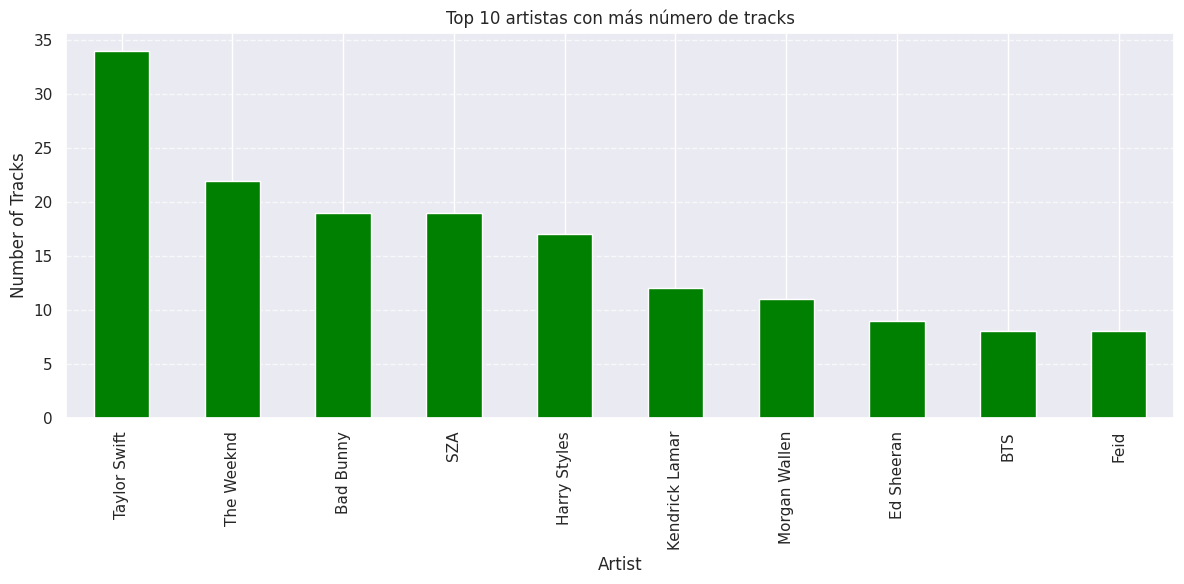

In [ ]:
# Gráfico con el top 10 de los artistas con más canciones
artist_counts = datos['artist(s)_name'].value_counts()
top_n = 10
top_artists = artist_counts.head(top_n)


plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='green')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title(f'Top {top_n} artistas con más número de tracks')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
# Verificando la cantidad de valores faltantes para cada columna.
base.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        45
bpm                      0
key                     88
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
## Dimensión de la base de datos
base.shape

(884, 24)

In [ ]:
# Información básica sobre un DataFrame llamado 'base
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            884 non-null    object
 1   artist(s)_name        884 non-null    object
 2   artist_count          884 non-null    int64 
 3   released_year         884 non-null    int64 
 4   released_month        884 non-null    int64 
 5   released_day          884 non-null    int64 
 6   in_spotify_playlists  884 non-null    int64 
 7   in_spotify_charts     884 non-null    int64 
 8   streams               884 non-null    object
 9   in_apple_playlists    884 non-null    int64 
 10  in_apple_charts       884 non-null    int64 
 11  in_deezer_playlists   884 non-null    object
 12  in_deezer_charts      884 non-null    int64 
 13  in_shazam_charts      839 non-null    object
 14  bpm                   884 non-null    int64 
 15  key                   796 non-null    ob

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creamos una función para calcular el VIF
def compute_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Excluimos las variables no numéricas (como 'track_name' o 'artist_name')
numeric_columns = base.select_dtypes(include=['number'])

# Calculamos el VIF para las variables numéricas
vif_result = compute_vif(numeric_columns)

# Muestra el resultado del VIF
print(vif_result)


                Variable        VIF
0           artist_count   4.375494
1          released_year  98.965993
2         released_month   4.299061
3           released_day   3.630856
4   in_spotify_playlists   3.682140
5      in_spotify_charts   2.934527
6     in_apple_playlists   4.725039
7        in_apple_charts   3.626106
8       in_deezer_charts   2.245330
9                    bpm  21.223881
10        danceability_%  33.302964
11             valence_%   8.778002
12              energy_%  30.077530
13        acousticness_%   3.344069
14    instrumentalness_%   1.074007
15            liveness_%   2.893826
16         speechiness_%   2.241003



released_year: Tiene un VIF muy alto, alrededor de 99.57. Este valor tan alto sugiere una alta multicolinealidad con otras variables en el conjunto de datos.

in_spotify_playlists: Tiene un VIF de aproximadamente 5.25. No parece tener una multicolinealidad extrema con otras variables.

streams: Tiene un VIF muy bajo, alrededor de 0.03, lo que significa que no muestra multicolinealidad significativa con otras variables.

in_apple_playlists: Tiene un VIF de aproximadamente 5.77, lo que sugiere cierta correlación con otras variables, pero no una multicolinealidad extrema.

bpm: Tiene un VIF bastante alto, cerca de 21.22. Esto sugiere una alta multicolinealidad con otras variables y puede requerir atención.

danceability_%: Tiene un VIF de aproximadamente 33.35, lo que indica una alta multicolinealidad con otras variables.

valence_%: Tiene un VIF de alrededor de 8.78, lo que sugiere cierta correlación con otras variables, pero no una multicolinealidad extrema.

energy_%: Tiene un VIF de aproximadamente 30.14, lo que sugiere una alta multicolinealidad con otras variables.


In [ ]:
## Convertido la columna 'streams' a tipo de dato entero (int)
base['streams'] = base['streams'].astype(int)

### Convertimos la variable Y continua en categórica

In [ ]:
# Representa la cantidad de streams de cada canción, y luego asigna etiquetas en función de si una canción tiene más o menos streams que la media.
base['Max_streams_C'] = ''
media = base['streams'].mean()
base['Max_streams_C'].loc[(base['streams'] >= media)] = 'Más de '+str(round(media/1e6))+' mill. de streams'
base['Max_streams_C'].loc[(base['streams'] < media)] = 'Menos de '+str(round(media/1e6))+' mill. de streams'

<ipython-input-19-a58bbc1cb384>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Max_streams_C'].loc[(base['streams'] >= media)] = 'Más de '+str(round(media/1e6))+' mill. de streams'
<ipython-input-19-a58bbc1cb384>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Max_streams_C'].loc[(base['streams'] < media)] = 'Menos de '+str(round(media/1e6))+' mill. de streams'


In [ ]:
base[['streams', 'Max_streams_C']]

,streams,Max_streams_C
0,141381703,Menos de 485 mill. de streams
1,133716286,Menos de 485 mill. de streams
2,140003974,Menos de 485 mill. de streams
3,800840817,Más de 485 mill. de streams
4,303236322,Menos de 485 mill. de streams
...,...,...
948,91473363,Menos de 485 mill. de streams
949,121871870,Menos de 485 mill. de streams
950,73513683,Menos de 485 mill. de streams
951,133895612,Menos de 485 mill. de streams


In [ ]:
base['streams'].info

<bound method Series.info of 0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 884, dtype: int64>

## Algunas descriptivas

In [ ]:
## Medidas de tendencia central e identificación de datos atípicos
base.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,8.840000e+02,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,1.575792,2020.890271,6.118778,14.269231,4309.400452,12.282805,4.851801e+08,64.073529,51.837104,2.798643,122.636878,67.455882,51.126697,64.346154,26.845023,1.582579,18.140271,10.369910
std,0.906702,2.755075,3.494459,9.033718,6534.805210,19.866921,5.564953e+08,85.349261,50.818182,6.223304,27.971601,14.240185,23.173476,16.248637,25.628538,8.489082,13.609195,10.057144
min,1.000000,2010.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,25.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,6.000000,835.000000,0.000000,1.366863e+08,12.000000,7.000000,0.000000,100.000000,58.000000,33.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,1985.500000,4.000000,2.720219e+08,31.500000,37.500000,0.000000,121.000000,70.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4681.750000,16.000000,6.082550e+08,80.250000,87.000000,2.000000,140.000000,78.000000,69.000000,77.000000,42.250000,0.000000,23.250000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
2.762000e+03

2762.0

In [ ]:
3.703895e+09

3703895000.0

En la variable streams: El número total de observaciones es 884. La media es aproximadamente 485,180,100, y la desviación estándar es de aproximadamente 556,495,300. Los valores mínimos y máximos son 2,762 y 3,703,895,000, respectivamente.

bpm: La media del tempo en bpm es de aproximadamente 122.64, con una desviación estándar de aproximadamente 27.97. El valor mínimo es 65 y el máximo es 206.

danceability_%: La media de la "danceability" es de aproximadamente 67.46, con una desviación estándar de aproximadamente 14.24. El valor mínimo es 25 y el máximo es 96.

valence_%: La media de "valence" es de aproximadamente 51.13, con una desviación estándar de aproximadamente 23.17. El valor mínimo es 4 y el máximo es 97.

energy_%: La media de "energy" es de aproximadamente 64.35, con una desviación estándar de aproximadamente 16.25. El valor mínimo es 9 y el máximo es 97.

In [ ]:
## Datos analíticos en variables categóricas
base.describe(include= (["O"]))

,track_name,artist(s)_name,in_deezer_playlists,in_shazam_charts,key,mode,Max_streams_C
count,884,884,884,839,796,884,884
unique,877,589,304,190,11,2,2
top,SNAP,Taylor Swift,15,0,C#,Major,Menos de 485 mill. de streams
freq,2,34,23,303,111,501,612


track_name: Hay 884 observaciones en esta columna. Hay 877 valores únicos, lo que sugiere que la mayoría de los nombres de las canciones son únicos en el conjunto de datos. El valor que más se repite (la moda) es "SNAP", que aparece 2 veces.

artist(s)_name: Hay un total de 884 observaciones y 589 valores únicos. El artista que más aparece es "Taylor Swift", que aparece 34 veces.

in_deezer_playlists: Hay 884 observaciones en esta columna. Hay 304 valores únicos. El valor que más se repite es "15", que aparece 23 veces.

in_shazam_charts: Esta columna tiene 839 observaciones válidas. Hay 190 valores únicos. El valor que más se repite es "0", que aparece 303 veces.

key: En esta columna, hay 796 observaciones válidas. Hay 11 valores únicos. El valor que más se repite es "C#", que aparece 111 veces.

mode: Hay 884 observaciones en esta columna. Hay 2 valores únicos, que representan los modos "Major" y "Minor". El modo "Major" aparece con mayor frecuencia, 501 veces.

Max_streams_C: Esta columna tiene 884 observaciones. Hay 2 valores únicos, que indican si una canción tiene más o menos streams que la media. El valor "Menos de 485 mill. de streams" aparece con mayor frecuencia, 612 veces.

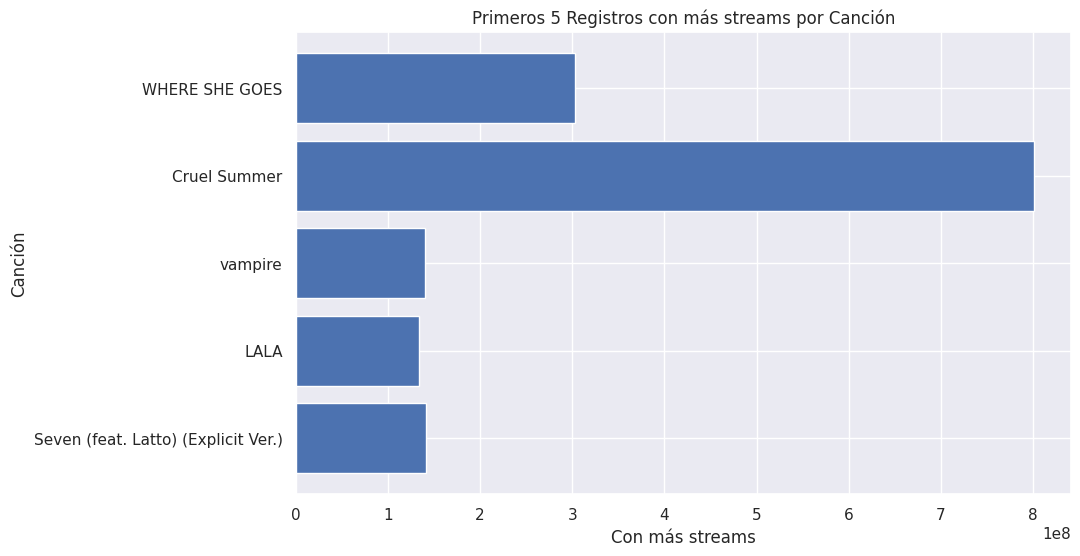

In [ ]:
# TOP 5 DE LAS CANCIONES CON MÁS STREAMS
top_5_data = filtro[['track_name', 'artist(s)_name', 'streams']].head(5)

# Configura el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras horizontal
plt.barh(top_5_data['track_name'], top_5_data['streams'])

# Personaliza el gráfico
plt.xlabel('Con más streams')
plt.ylabel('Canción')
plt.title('Primeros 5 Registros con más streams por Canción')

# Muestra el gráfico
plt.show()


In [ ]:
## No hay datos duplicados
base.duplicated().sum()

0

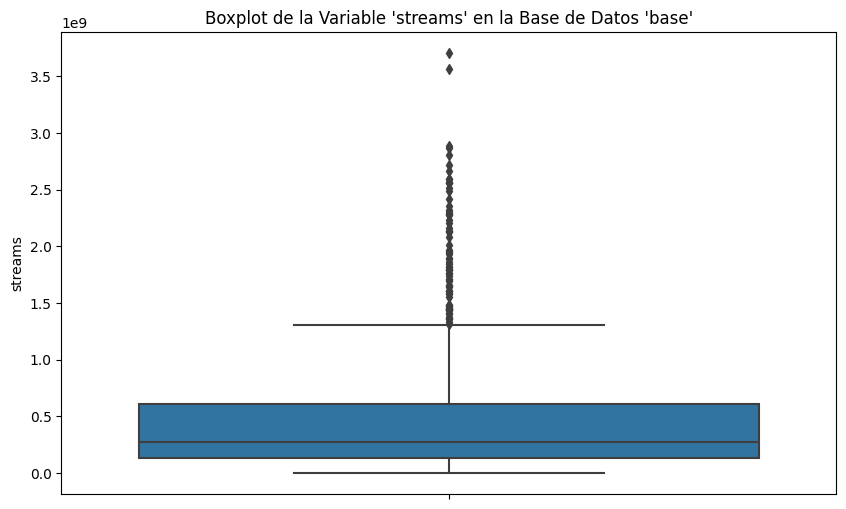

In [ ]:
# Boxplot para identificiar datos atípicos en la variable 'streams'
plt.figure(figsize=(10, 6))
sns.boxplot(data=base, y='streams')
plt.title("Boxplot de la Variable 'streams' en la Base de Datos 'base'")
plt.show()


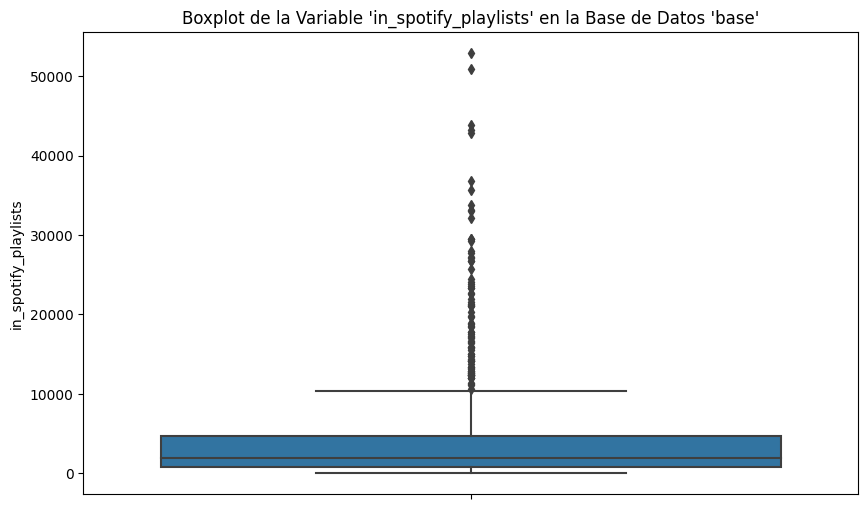

In [ ]:
# Boxplot para identificiar datos atípicos en la variable 'streams'
plt.figure(figsize=(10, 6))
sns.boxplot(data=base, y='in_spotify_playlists')
plt.title("Boxplot de la Variable 'in_spotify_playlists' en la Base de Datos 'base'")
plt.show()

<ipython-input-29-68fefddd7683>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = base.corr()


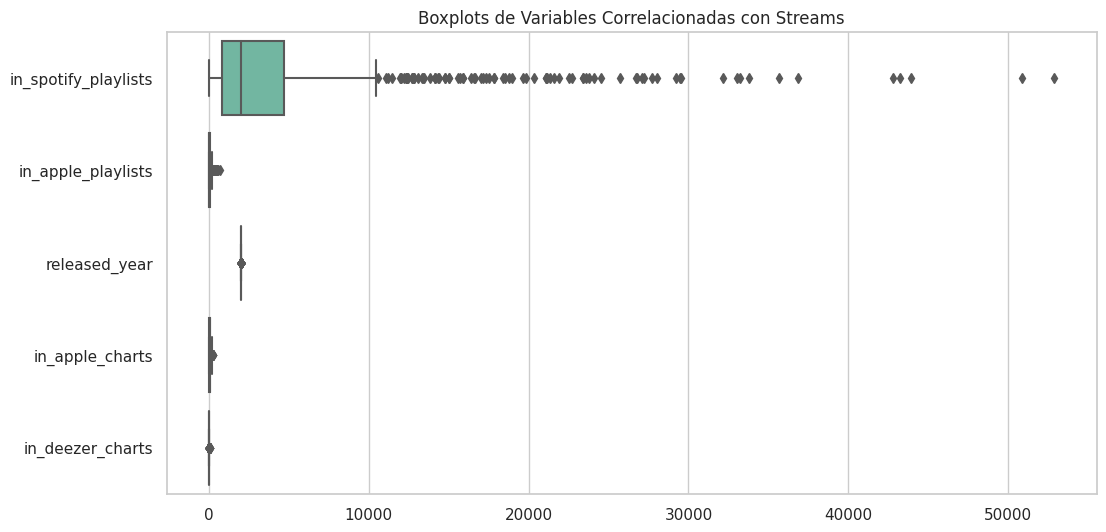

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = base.corr()

# Seleccionar las variables con correlación significativa con 'streams'
significant_correlation = correlation_matrix['streams'].abs().sort_values(ascending=False)[1:6]

# Seleccionar solo las columnas relevantes en el DataFrame
relevant_columns = base[significant_correlation.index]

# Crear un conjunto de boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(data=relevant_columns, orient="h", palette="Set2")

# Título del gráfico
plt.title('Boxplots de Variables Correlacionadas con Streams')

# Mostrar el gráfico
plt.show()


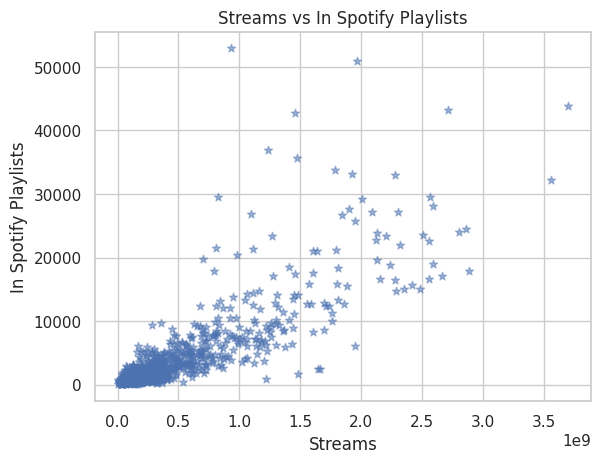

In [ ]:
# Gráfico de dispersión entre la variable 'streams' y  la variable 'In Spotify Playlists'
fig, ax = plt.subplots()
ax.scatter(base['streams'], base['in_spotify_playlists'], marker='*', alpha=0.5)

ax.set_xlabel('Streams')
ax.set_ylabel('In Spotify Playlists')

plt.title('Streams vs In Spotify Playlists')
plt.show()


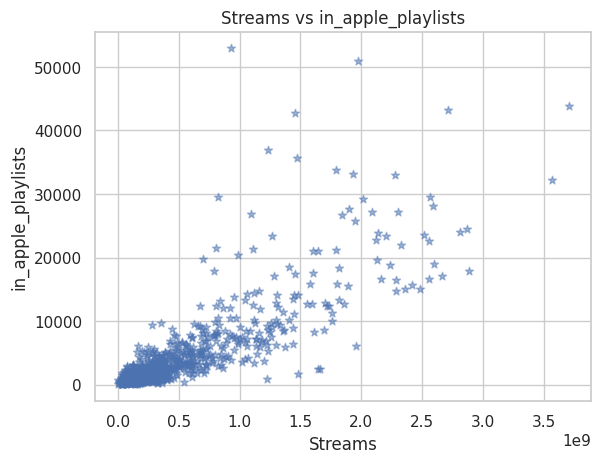

In [ ]:
# Gráfico de dispersión entre la variable 'streams' y  la variable 'in_apple_playlists'
fig, ax = plt.subplots()
ax.scatter(base['streams'], base['in_spotify_playlists'], marker='*', alpha=0.5)

ax.set_xlabel('Streams')
ax.set_ylabel('in_apple_playlists')

plt.title('Streams vs in_apple_playlists')
plt.show()

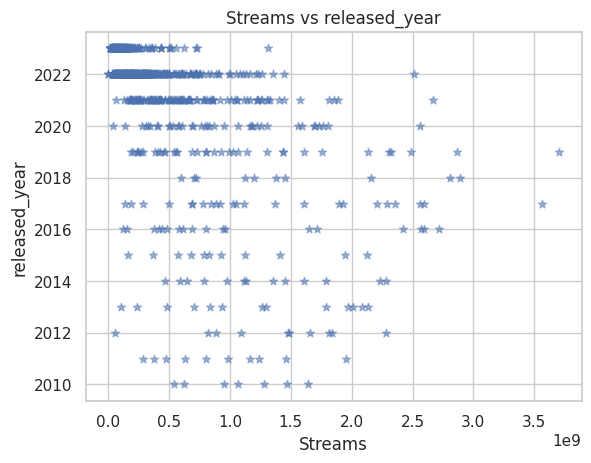

In [ ]:
# Gráfico de dispersión entre la variable 'streams' y  la variable 'in_apple_playlists'
fig, ax = plt.subplots()
ax.scatter(base['streams'], base['released_year'], marker='*', alpha=0.5)

ax.set_xlabel('Streams')
ax.set_ylabel('released_year')

plt.title('Streams vs released_year')
plt.show()

In [ ]:
base[base['streams']>3.503895e+09]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Max_streams_C
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,Más de 485 mill. de streams
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,Más de 485 mill. de streams


In [ ]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = base['streams'].quantile(q=.25)
Q3 = base['streams'].quantile(q=.75)
IQR = Q3 - Q1 # Es lo mismo que Q3 - Q1
# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
base_sin_outliers = base[~((base['streams'] < (Q1-1.5*IQR)) | (base['streams'] > (Q3+1.5*IQR)))]
# ¿Cuál es la dimensión de nuestra base final?
base_sin_outliers.shape

(809, 25)

In [ ]:
# Comparemos las dimensiones de las bases de datos
base.shape,base_sin_outliers.shape

((884, 25), (809, 25))

In [ ]:
base_sin_outliers.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,8.090000e+02,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,1.595797,2021.255871,6.116193,14.281829,2959.317676,11.278121,3.484026e+08,47.279357,48.184178,2.504326,122.787392,67.668727,50.990111,64.490729,26.588381,1.692213,18.268232,10.632880
std,0.928659,2.386024,3.469649,8.900561,3986.713369,18.677050,3.053237e+08,52.954292,49.135063,5.480415,28.078158,14.289580,23.242531,16.246941,25.254887,8.822533,13.775013,10.221311
min,1.000000,2010.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,25.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,6.000000,788.000000,0.000000,1.270266e+08,11.000000,6.000000,0.000000,100.000000,58.000000,32.000000,54.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,1730.000000,3.000000,2.409181e+08,27.000000,30.000000,0.000000,121.000000,70.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,3618.000000,15.000000,4.762448e+08,66.000000,81.000000,2.000000,140.000000,79.000000,69.000000,77.000000,42.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,1.309887e+09,328.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


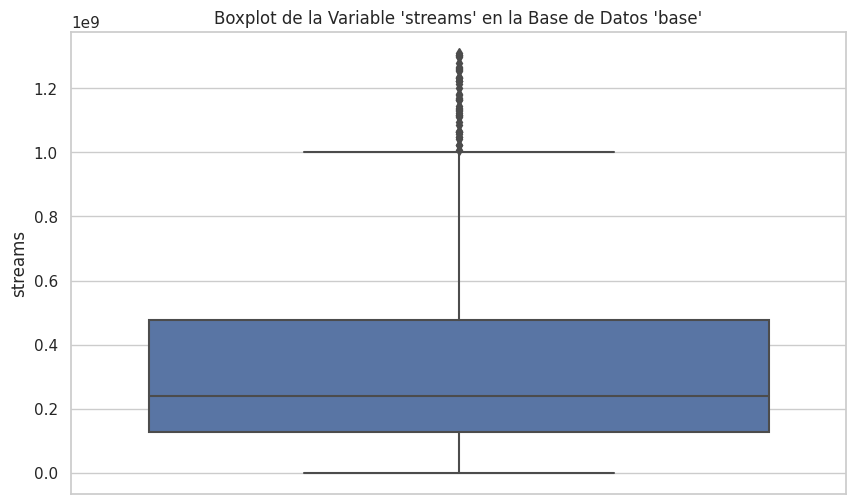

In [ ]:
# Boxplot para identificiar datos atípicos en la variable 'streams'
plt.figure(figsize=(10, 6))
sns.boxplot(data=base_sin_outliers, y='streams')
plt.title("Boxplot de la Variable 'streams' en la Base de Datos 'base'")
plt.show()

Text(0.5, 1.0, 'Histograma - streams')

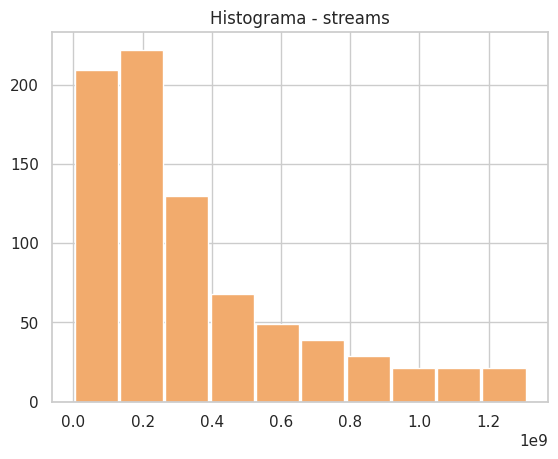

In [ ]:
plt.hist(x=base_sin_outliers['streams'],  color='#F2AB6D', rwidth=0.95)
plt.title('Histograma - streams')

In [ ]:
# Top 10 de los artistas con sus canciones  con mas streams en el año 2023
nueva_base = base_sin_outliers[['streams', 'artist(s)_name', 'track_name']]

# Verifica el nuevo DataFrame
print(nueva_base.head(10))

     streams              artist(s)_name                           track_name
0  141381703            Latto, Jung Kook  Seven (feat. Latto) (Explicit Ver.)
1  133716286                 Myke Towers                                 LALA
2  140003974              Olivia Rodrigo                              vampire
3  800840817                Taylor Swift                         Cruel Summer
4  303236322                   Bad Bunny                       WHERE SHE GOES
5  183706234           Dave, Central Cee                             Sprinter
6  725980112  Eslabon Armado, Peso Pluma                      Ella Baila Sola
7   58149378                     Quevedo                             Columbia
8   95217315                       Gunna                             fukumean
9  553634067       Peso Pluma, Yng Lvcas                      La Bebe - Remix


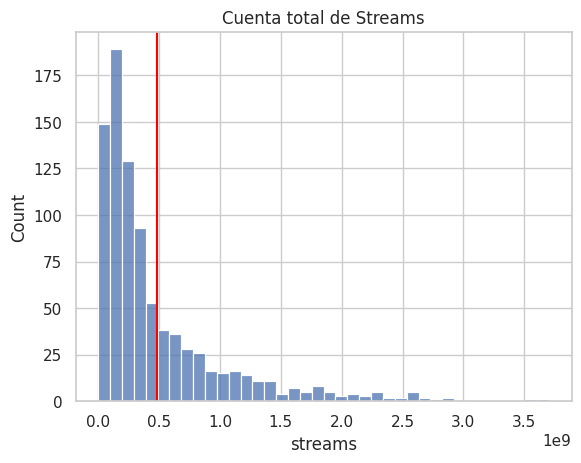

In [ ]:
plt.title('Cuenta total de Streams')
sns.histplot(data=base, x="streams")
plt.axvline(base['streams'].mean(), color='red')

La linea roja es el promedio

**Nota:** Vemos que es una base de datos de música muy top en el mercado. El promedio de streams es 400 millones (relativamente alto).

In [ ]:
base['streams'].describe()

count    8.840000e+02
mean     4.851801e+08
std      5.564953e+08
min      2.762000e+03
25%      1.366863e+08
50%      2.720219e+08
75%      6.082550e+08
max      3.703895e+09
Name: streams, dtype: float64

El recuento (count) de los datos es de 884.

La media (mean) de los datos es de aproximadamente 485,180,100.

La desviación estándar (std) de los datos es de aproximadamente 556,495,300.

El valor mínimo (min) de los datos es de 2,762.

El primer cuartil (25%) de los datos es de aproximadamente 136,686,300.

La mediana (50%) de los datos es de aproximadamente 272,021,900.

El tercer cuartil (75%) de los datos es de aproximadamente 608,255,000.

El valor máximo (max) de los datos es de aproximadamente 3,703,895,000.

Estos datos nos proporcionan información sobre la distribución y la variabilidad de la variable "streams". La media nos indica el valor promedio de la variable, mientras que la desviación estándar nos muestra cuánto varían los valores con respecto a la media. Los cuartiles nos dan información sobre la distribución de los datos y nos permiten identificar los valores atípicos.

In [ ]:
3.703895e+09

3703895000.0

In [ ]:
base['Max_streams_C'].value_counts()

Menos de 485 mill. de streams    612
Más de 485 mill. de streams      272
Name: Max_streams_C, dtype: int64

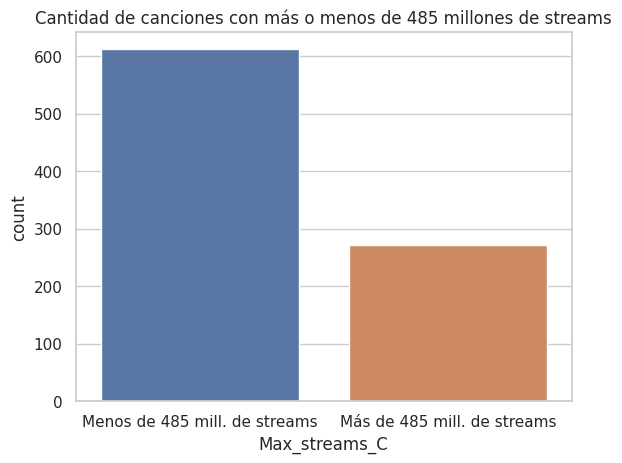

In [ ]:
# Crea un gráfico de barras para contar observaciones en función de "Max_streams_C"
sns.countplot(data=base, x="Max_streams_C")

# Establece un título para el gráfico
plt.title("Cantidad de canciones con más o menos de 485 millones de streams")

# Muestra el gráfico
plt.show()


In [ ]:
base.corr()

<ipython-input-44-2031aea24313>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base.corr()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.159515,0.028788,-0.029594,-0.073931,-0.014205,-0.117618,-0.032860,-0.084184,-0.006725,-0.035775,0.210944,0.145017,0.145962,-0.106494,-0.049221,0.024009,0.115713
released_year,0.159515,1.000000,-0.011349,0.111806,-0.631838,-0.042593,-0.570728,-0.327367,-0.101012,0.074802,0.004861,0.202416,0.090702,0.046589,-0.006400,-0.076870,0.080302,0.118975
released_month,0.028788,-0.011349,1.000000,0.007739,-0.098169,-0.035394,-0.003124,0.010003,-0.010650,-0.013220,-0.032023,-0.030061,-0.108599,-0.098796,0.068403,0.035154,-0.026379,0.048664
released_day,-0.029594,0.111806,0.007739,1.000000,-0.061599,0.027921,0.025817,0.044581,0.018699,0.065165,-0.020516,0.064279,0.088103,0.035627,0.025485,0.017667,0.001756,-0.021353
in_spotify_playlists,-0.073931,-0.631838,-0.098169,-0.061599,1.000000,0.193796,0.818730,0.751418,0.309959,0.192096,-0.005892,-0.060345,0.001931,-0.000584,-0.042260,-0.023999,-0.059227,-0.096185
in_spotify_charts,-0.014205,-0.042593,-0.035394,0.027921,0.193796,1.000000,0.242591,0.249641,0.586047,0.604223,0.040002,0.022009,0.052692,0.076092,-0.037740,-0.004745,-0.045456,-0.096513
streams,-0.117618,-0.570728,-0.003124,0.025817,0.818730,0.242591,1.000000,0.783156,0.331308,0.243462,0.005041,-0.083696,-0.020192,-0.051195,0.025347,-0.042104,-0.059392,-0.116229
in_apple_playlists,-0.032860,-0.327367,0.010003,0.044581,0.751418,0.249641,0.783156,1.000000,0.408898,0.395404,0.017251,0.011731,0.066870,0.056956,-0.067985,-0.057716,-0.056355,-0.105467
in_apple_charts,-0.084184,-0.101012,-0.010650,0.018699,0.309959,0.586047,0.331308,0.408898,1.000000,0.396953,0.037803,-0.026325,0.044056,0.115175,-0.085891,-0.029373,-0.016414,-0.168809
in_deezer_charts,-0.006725,0.074802,-0.013220,0.065165,0.192096,0.604223,0.243462,0.395404,0.396953,1.000000,0.032414,0.070019,0.091553,0.096816,-0.020482,0.006146,-0.004106,-0.091542


<ipython-input-45-35e176140cc3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr())


<Axes: >

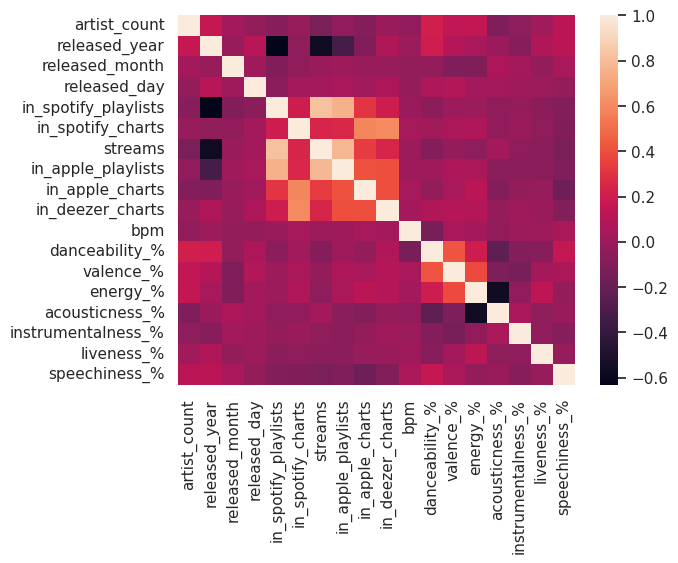

In [ ]:
sns.heatmap(base.corr())

In [ ]:
base.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'Max_streams_C'],
      dtype='object')

In [ ]:
correlation = base['streams'].corr(base['in_spotify_charts'])
print(f"La correlación entre... {correlation}")

La correlación entre... 0.24259113780018932


In [ ]:
correlation = base['streams'].corr(base['in_spotify_playlists'])
print(f"La correlación entre... {correlation}")

La correlación entre... 0.818730458446168


In [ ]:
correlation = base['streams'].corr(base['in_apple_playlists'])
print(f"La correlación entre... {correlation}")

La correlación entre... 0.7831564003524144


In [ ]:
correlation = base['streams'].corr(base['in_apple_charts'])
print(f"La correlación entre... {correlation}")

La correlación entre... 0.3313077848150561


In [ ]:
correlation = base['streams'].corr(base['in_deezer_charts'])
print(f"La correlación entre... {correlation}")

La correlación entre... 0.2434623359707837


La variable streams está positivamente correlacionada con in_spotify_playlists (0.82), in_spotify_charts (0.24) e in_apple_playlists (0.78). Las canciones que están en más listas de reproducción de Spotify y Apple tienden a tener más streams.

La variable streams tiene una correlación negativa con released_year (-0.57) y bpm (-0.08). Las canciones más antiguas y las canciones con un tempo más bajo tienden a tener menos streams.

La variable released_year tiene una correlación negativa con in_spotify_playlists (-0.63) y in_spotify_charts (-0.04). Las canciones más antiguas tienden a estar menos presentes en las listas de reproducción y los gráficos de Spotify.

Las variables relacionadas con las características de la música, como danceability_%, valence_%, energy_%, tienen correlaciones positivas o negativas con streams, lo que indica que estas características pueden influir en la popularidad de una canción.

Las variables in_deezer_charts e in_shazam_charts tienen correlaciones positivas con otras variables, lo que sugiere que la presencia de una canción en las listas de Deezer y Shazam puede estar relacionada con su popularidad.

<ipython-input-80-8957b4fc7c3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = base.corr()


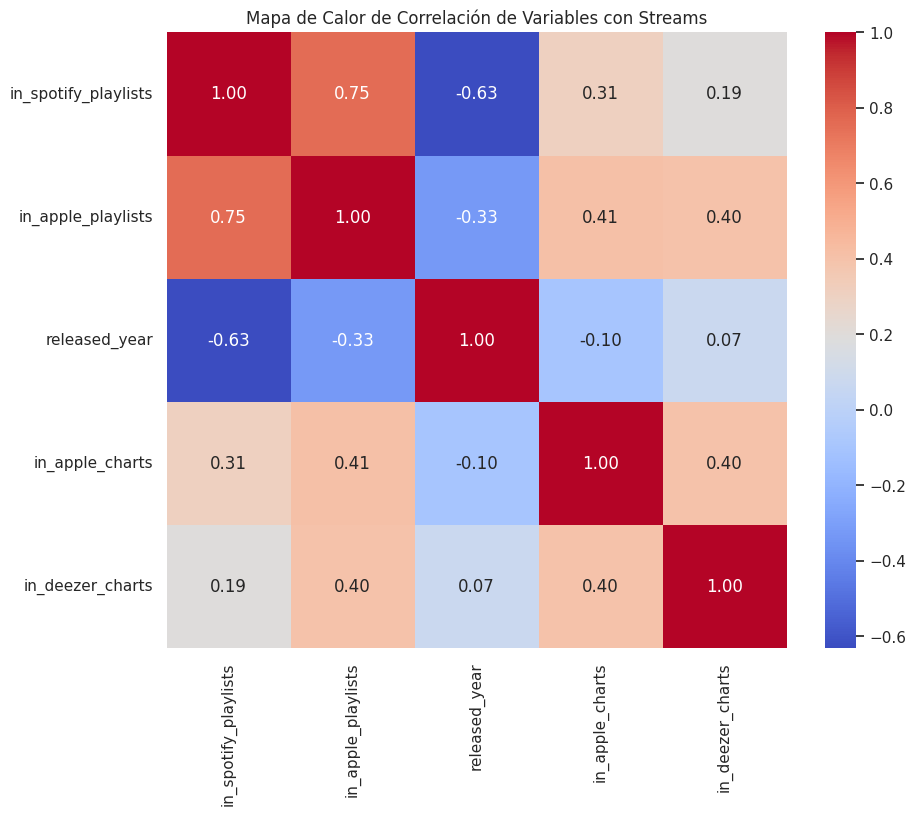

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = base.corr()

# Seleccionar las variables con correlación significativa con 'streams'
significant_correlation = correlation_matrix['streams'].abs().sort_values(ascending=False)[1:6]

heatmap_data = base[significant_correlation.index]

plt.figure(figsize=(10, 8))
sns.set(font_scale=1)
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Título del gráfico
plt.title('Mapa de Calor de Correlación de Variables con Streams')

# Mostrar el gráfico
plt.show()


## Modelo para contrastar

### Logit

El objetivo del ejercicio es que usted construya un clasificador diferente al del modelo logarítmico y compare sus resultados contra este. Tenemos principalmente dos categorías:

* Entre **Menos de 485 mill. de streams**
* Entre **Más de 485 mill. de streams**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Definimos 1 como estar en la categoría de muchos streams
y = base['Max_streams_C'] == 'Más de 485 mill. de streams'
y = y + [0] * len(y)
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Max_streams_C, dtype: int64

In [ ]:
X = base[['in_spotify_playlists', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
X.head()

,in_spotify_playlists,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,553,80,89,83,31,0,8,4
1,1474,71,61,74,7,0,10,4
2,1397,51,32,53,17,0,31,6
3,7858,55,58,72,11,0,11,15
4,3133,65,23,80,14,63,11,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [ ]:
modeloLog  = LogisticRegression(random_state=16)

In [ ]:
# Ajustamos el modelo con los datos de entrenamiento (70%)
modeloLog.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [ ]:
probabilidades = modeloLog.predict_proba(X_test)[:,1]

In [ ]:
from sklearn import metrics

In [ ]:
umbral = 0.2
pred = probabilidades >= umbral
pred = pred + [0] * len(pred)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0])

In [ ]:
matriz = metrics.confusion_matrix(y_test, pred)
matriz

array([[162,  22],
       [  8,  74]])

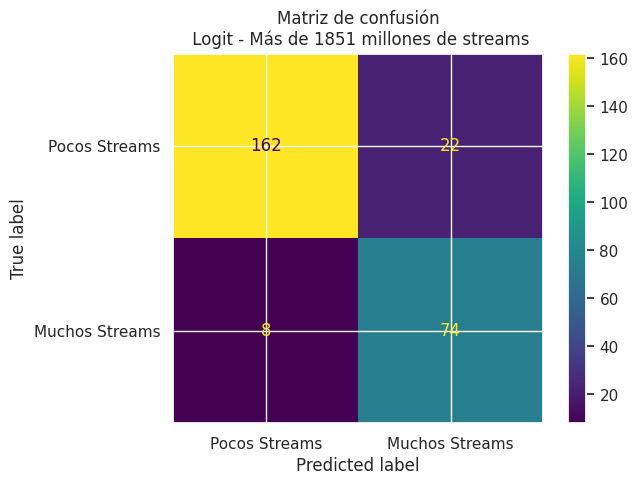

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión\n Logit - Más de 1851 millones de streams")
plt.show()

El modelo identificó correctamente 74 ejemplos como "Más de 485 mill. de streams" (clase positiva).
El clasificador identificó incorrectamente 22 ejemplos como "Más de 485 mill. de streams" cuando en realidad no lo eran (falsos positivos).
El clasificador identificó correctamente 162 ejemplos como "Menos de 485 mill. de streams" (clase negativa).
El clasificador identificó incorrectamente 8 ejemplos como "Menos de 485 mill. de streams" cuando en realidad no lo eran (falsos negativos).

In [ ]:
# Accuracy:
(162 + 74)/(162 + 22 + 8 +74)

0.8872180451127819

El modelo acierta el 88.7% sobre si una canción tendrá "Más de 485 mill. de streams" o "Menos de 485 mill. de streams

## Modelo alternativo (15 puntos)

Para este ejercicio, siga las siguientes instrucciones. No se tendrá en cuenta si su modelo mejora el desempeño de la predicción, sino la rigurosidad de su desarrollo.

### 1. Escoja un nuevo modelo de clasificación

In [ ]:
## Random Forest (Bosques Aleatorios)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Recuerde que contamos con las siguientes bases:
# X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Entrene el modelo

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3. Haga las predicciones correspondientes

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9210526315789473


In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1])

 El resultado de Accuracy del 0.9211 (o 92.11%) indica que el modelo de clasificación tiene un buen desempeño y está clasificando las observaciones en las dos categorías (Menos de 485 mill. de streams y Más de 485 mill. de streams)

### 4. Elabore la matriz de confusión y calcule la precisión (accuracy)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[184   9]
 [ 12  61]]


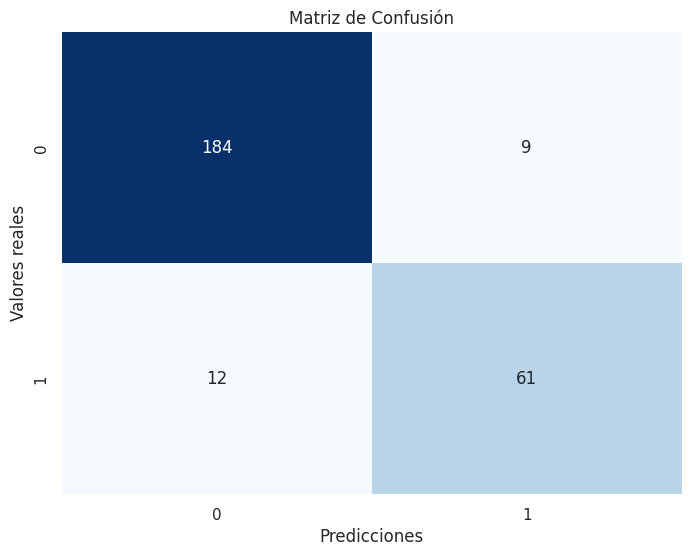

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
# Evaluar el modelo y generar un informe de clasificación
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       193
           1       0.87      0.84      0.85        73

    accuracy                           0.92       266
   macro avg       0.91      0.89      0.90       266
weighted avg       0.92      0.92      0.92       266



In [ ]:
print('----------------------------------------------------')
print("Valores reales para evaluar el modelo")
print('----------------------------------------------------')
print(y_test)
print('----------------------------------------------------')
print("Valores predichos")
print('----------------------------------------------------')
print(y_pred)

----------------------------------------------------
Valores reales para evaluar el modelo
----------------------------------------------------
44     0
408    1
695    1
800    0
948    0
      ..
383    0
388    0
183    0
733    0
323    1
Name: Max_streams_C, Length: 266, dtype: int64
----------------------------------------------------
Valores predichos
----------------------------------------------------
[0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 1]


### 5. Haga un análisis de hiperparámetros para escoger la mejor versión de su modelo

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],           # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],         # Mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]            # Mínimo de muestras requeridas en un nodo hoja
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor Accuracy:", grid_search.best_score_)



Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mejor Accuracy: 0.8932599003409388


El mejor conjunto de hiperparámetros encontrado para el modelo Random Forest es el que tiene una profundidad máxima de 10, un mínimo de 4 muestras por nodo hoja, un mínimo de 10 muestras requeridas para dividir un nodo y un total de 50 estimadores (árboles) en el bosque.

In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [ ]:
accuracy = best_clf.score(X_test, y_test)
print("Testeo accuracy:", accuracy)

Testeo accuracy: 0.9097744360902256


En el conjunto de prueba, el 90.98% se clasificaron correctamente

### 6. Escoja entre el modelo logit y su modelo a la luz de sus resultados, comente

El objetivo de estos modelos es tomar las características de una nueva canción como entrada y predecir en qué categoría de reproducciones se ubicará, ya sea "Menos de 485 mill. de streams" o "Más de 485 mill. de streams".

Accuracy: Ambos modelos tienen buenas puntuaciones de accuracy. Logistic Regression tiene un accuracy del 88.7%, mientras que Random Forest tiene un accuracy del 92.1%. Desde una perspectiva puramente basada en el accuracy, Random Forest parece funcionar mejor en este conjunto de datos.

Precision y Recall: En el caso del Random Forest, la precision y recall para ambas clases son bastante equilibradas, Logistic Regression también tiene resultados decentes en precision y recall, aunque un poco más bajos que Random Forest.

F1-Score: Random Forest tiene un F1-score promedio de 0.90, mientras que Logistic Regression tiene un F1-score promedio de 0.90.

Robustez: Random Forest tiende a ser más robusto frente a valores atípicos y datos ruidosos en comparación con Logistic Regression.

## Análisis de resultados (10 puntos)

Realice un análisis de resultados corto (hasta 300 palabras) considerando:
- Datos trabajados (1 punto)
- Resultados obtenidos (3 puntos)
- Cifras principales de los resultados obtenidos (2 puntos)
- Consideraciones sobre el modelo o modelos escogidos de comparación (2 puntos)
- Limitaciones del análisis ( 2 puntos)

### Forma del notebook (5 puntos)
Criterios:
* El notebook incluye código funcional y presenta los resultados (3 puntos)
* Los resultados se encuentran cometados dentro del notebook (1 punto)
* El código se encuentra comentado explicando qué realiza cada componente y las observaciones relevantes sobre implementación (1 punto)

# Puntos extra (hasta 5 puntos)
Hasta 5 puntos adicionales si se incluyen uno o varios de los siguientes componentes:
- Analisis exploratorio de datos
- Incluir componentes de Crisp DM
- Técnicas adicionales, si palican (clustering, ACP)
- Caracterización y tratamiento de faltantes y atípicos